In [1]:
import keras

In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

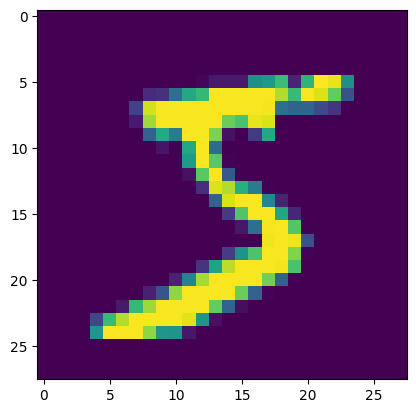

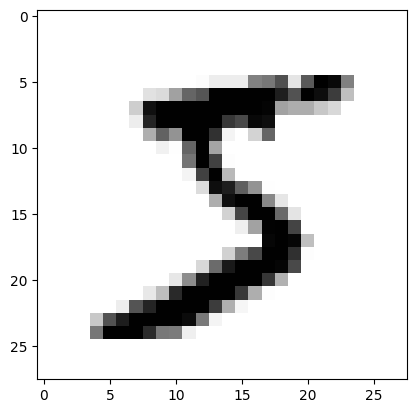

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

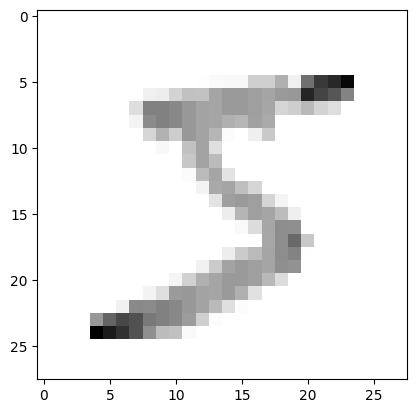

In [7]:
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


In [10]:
import numpy as np

In [11]:
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X_trainr.shape)
print(X_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from keras import models
from keras import layers

In [13]:
model = models.Sequential()

model.add(keras.Input(shape=X_trainr.shape[1:]))  

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


# Fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))

model.add(layers.Flatten())
model.add(layers.Dense(32))
model.add(layers.Activation("relu"))

model.add(layers.Flatten())
model.add(layers.Dense(10))
model.add(layers.Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7643 - loss: 0.7047 - val_accuracy: 0.9504 - val_loss: 0.1595
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9614 - loss: 0.1197 - val_accuracy: 0.9542 - val_loss: 0.1423
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9745 - loss: 0.0813 - val_accuracy: 0.9776 - val_loss: 0.0732
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9815 - loss: 0.0617 - val_accuracy: 0.9787 - val_loss: 0.0716
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9825 - val_loss: 0.0598


In [17]:
test_loss, test_acc = model.evaluate(X_testr, y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0686
0.05544454976916313
0.9837999939918518


In [18]:
predicts = model.predict(X_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
predicts.shape

(10000, 10)

In [20]:
print(predicts[10])

[9.9996614e-01 2.3099726e-06 1.5296640e-06 9.1120205e-09 6.6232047e-08
 8.6465313e-08 3.3132312e-06 1.0428169e-08 8.1692292e-08 2.6264801e-05]


In [21]:
print(np.argmax(predicts[10]))

0


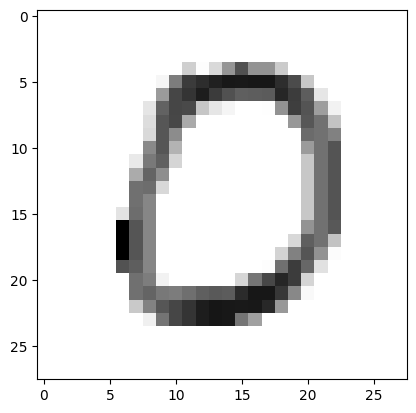

In [22]:
plt.imshow(X_testr[10], cmap = plt.cm.binary)

In [33]:
layer_outputs = [layer.output for layer in model.layers[:9]]

activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)

# Get activations for a single image
activations = activation_model.predict(X_testr[10].reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


c:\Users\loi27\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


(1, 26, 26, 64)


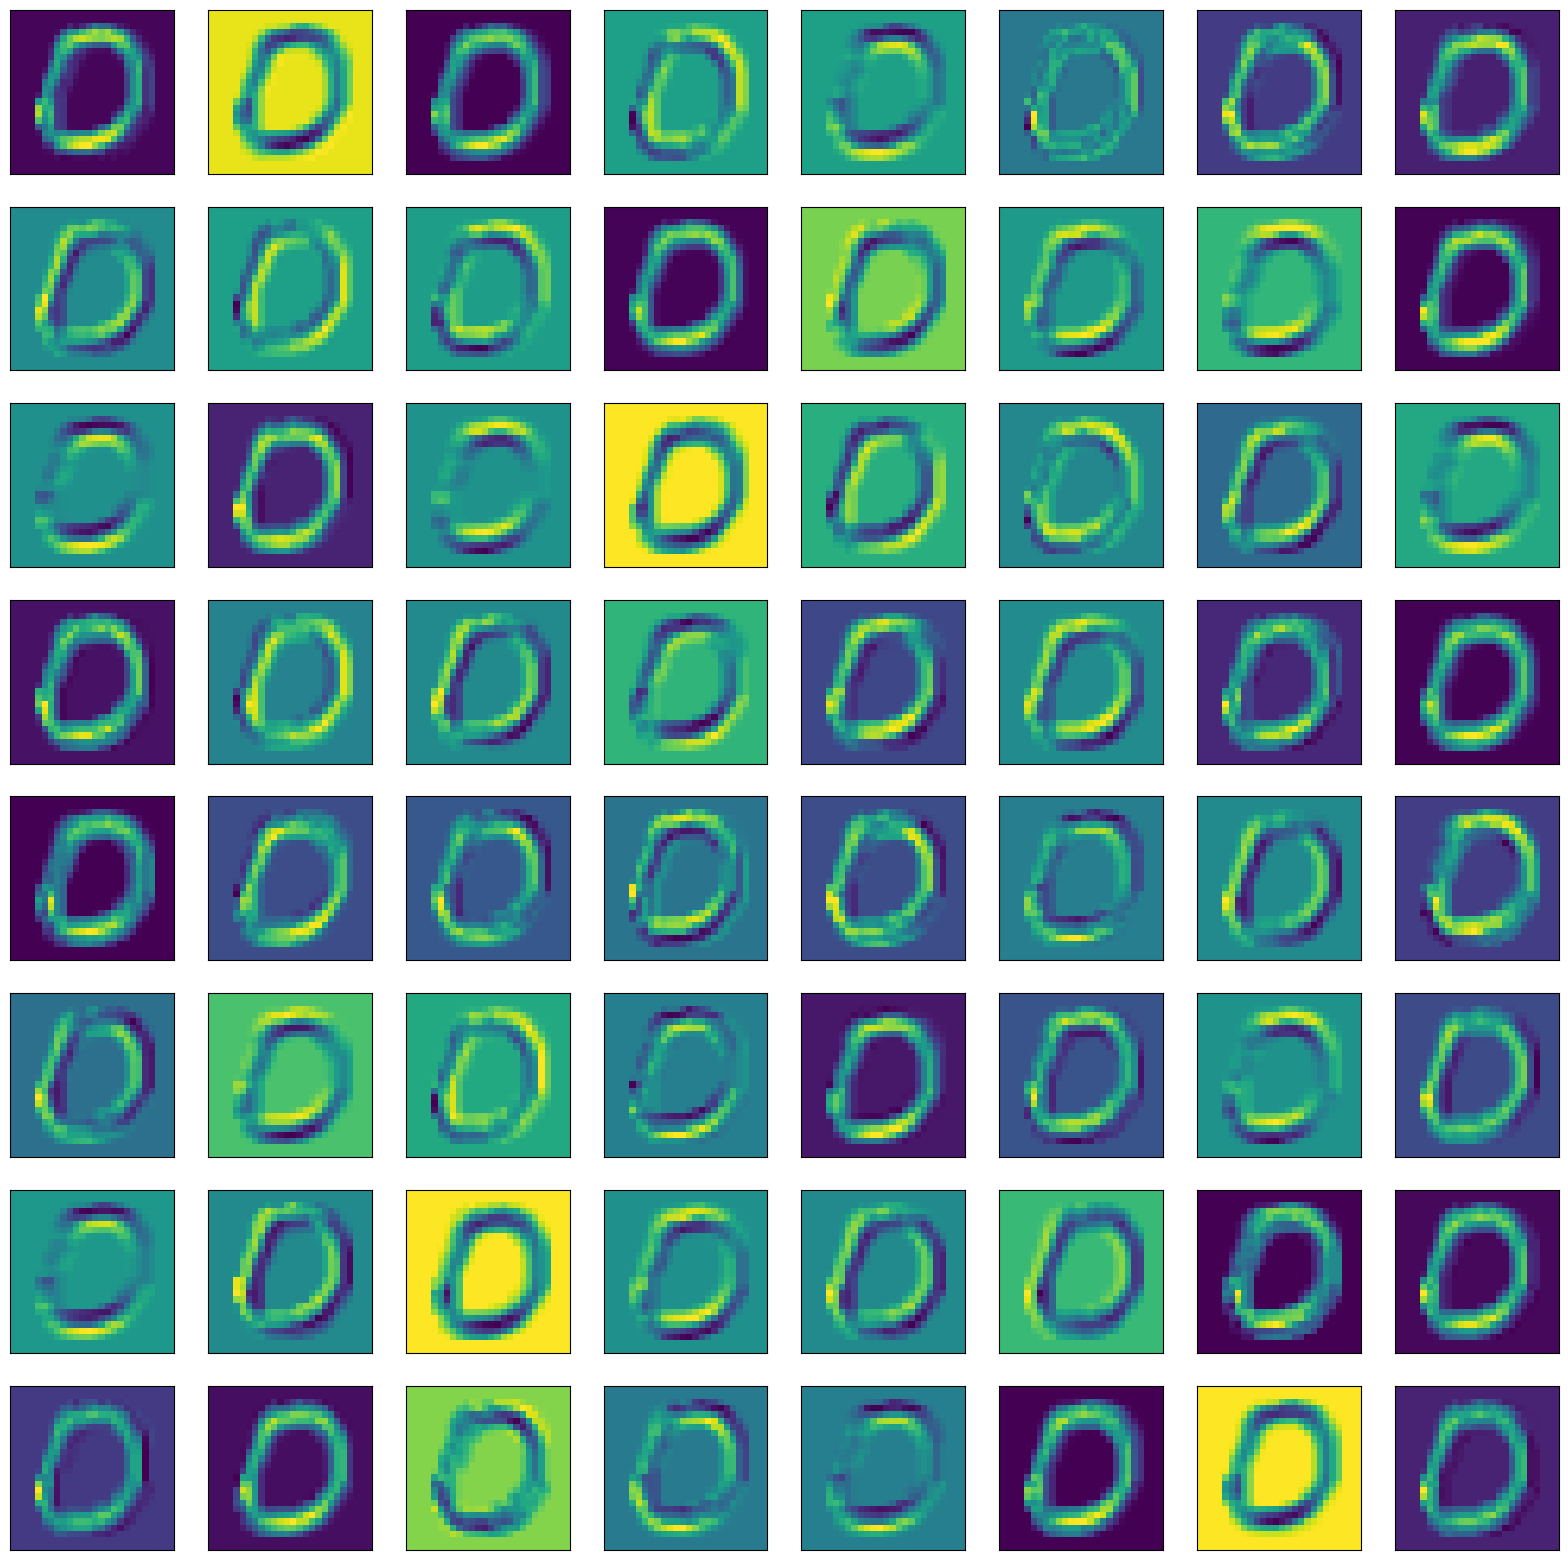

In [34]:
conv2d1_output = activations[0]      
# shape of first layer activation 
print(conv2d1_output.shape) 

plt.figure(figsize=(20,20))
for i in range(conv2d1_output.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(conv2d1_output[0, :, :, i], cmap ='viridis')
plt.show()

(1, 26, 26, 64)


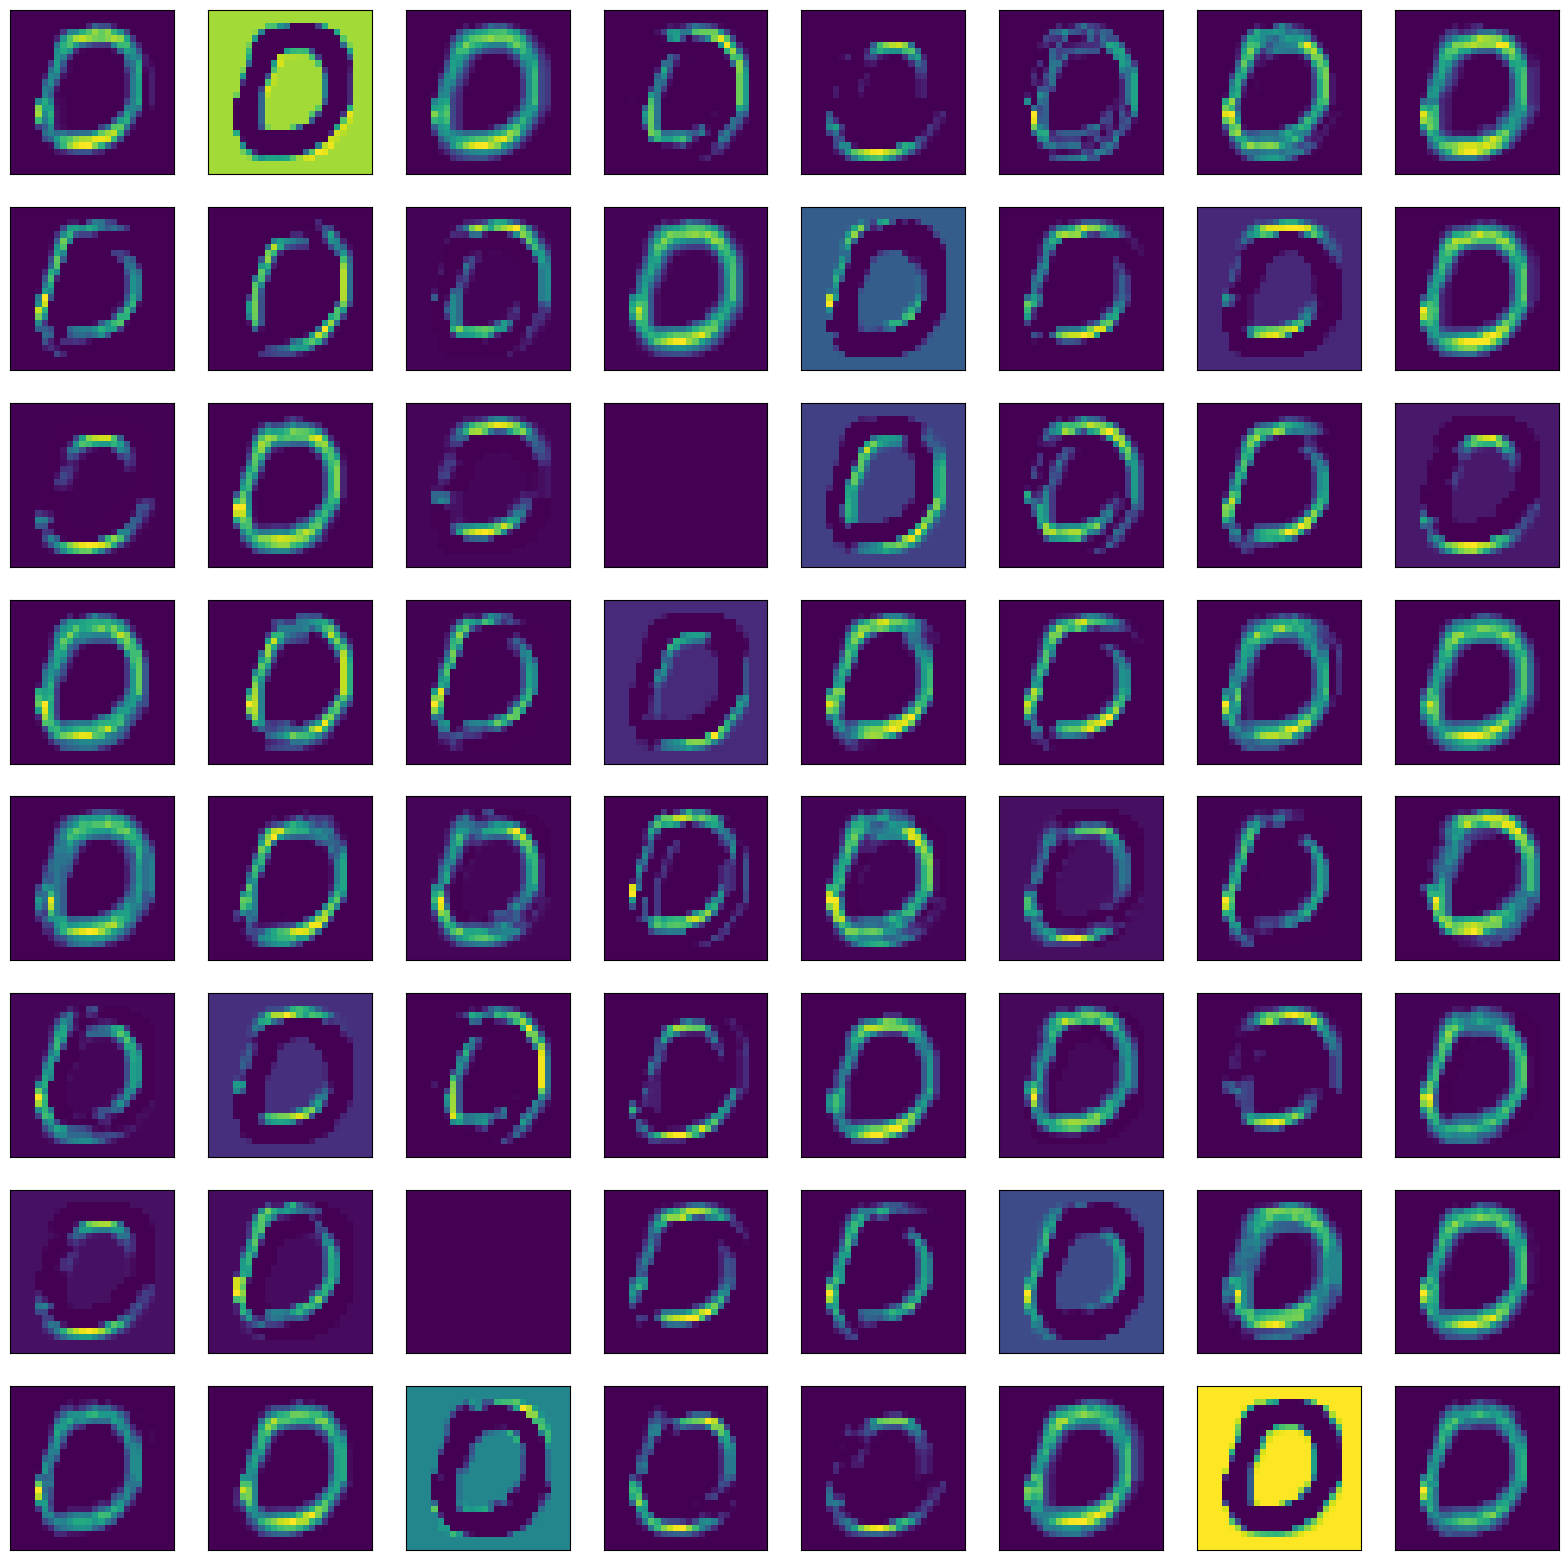

In [ ]:
act1_output = activations[1]      
# shape of first layer activation 
print(act1_output.shape) 

plt.figure(figsize=(20,20))
for i in range(act1_output.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(act1_output[0, :, :, i], cmap ='viridis')
plt.show()

(1, 13, 13, 64)


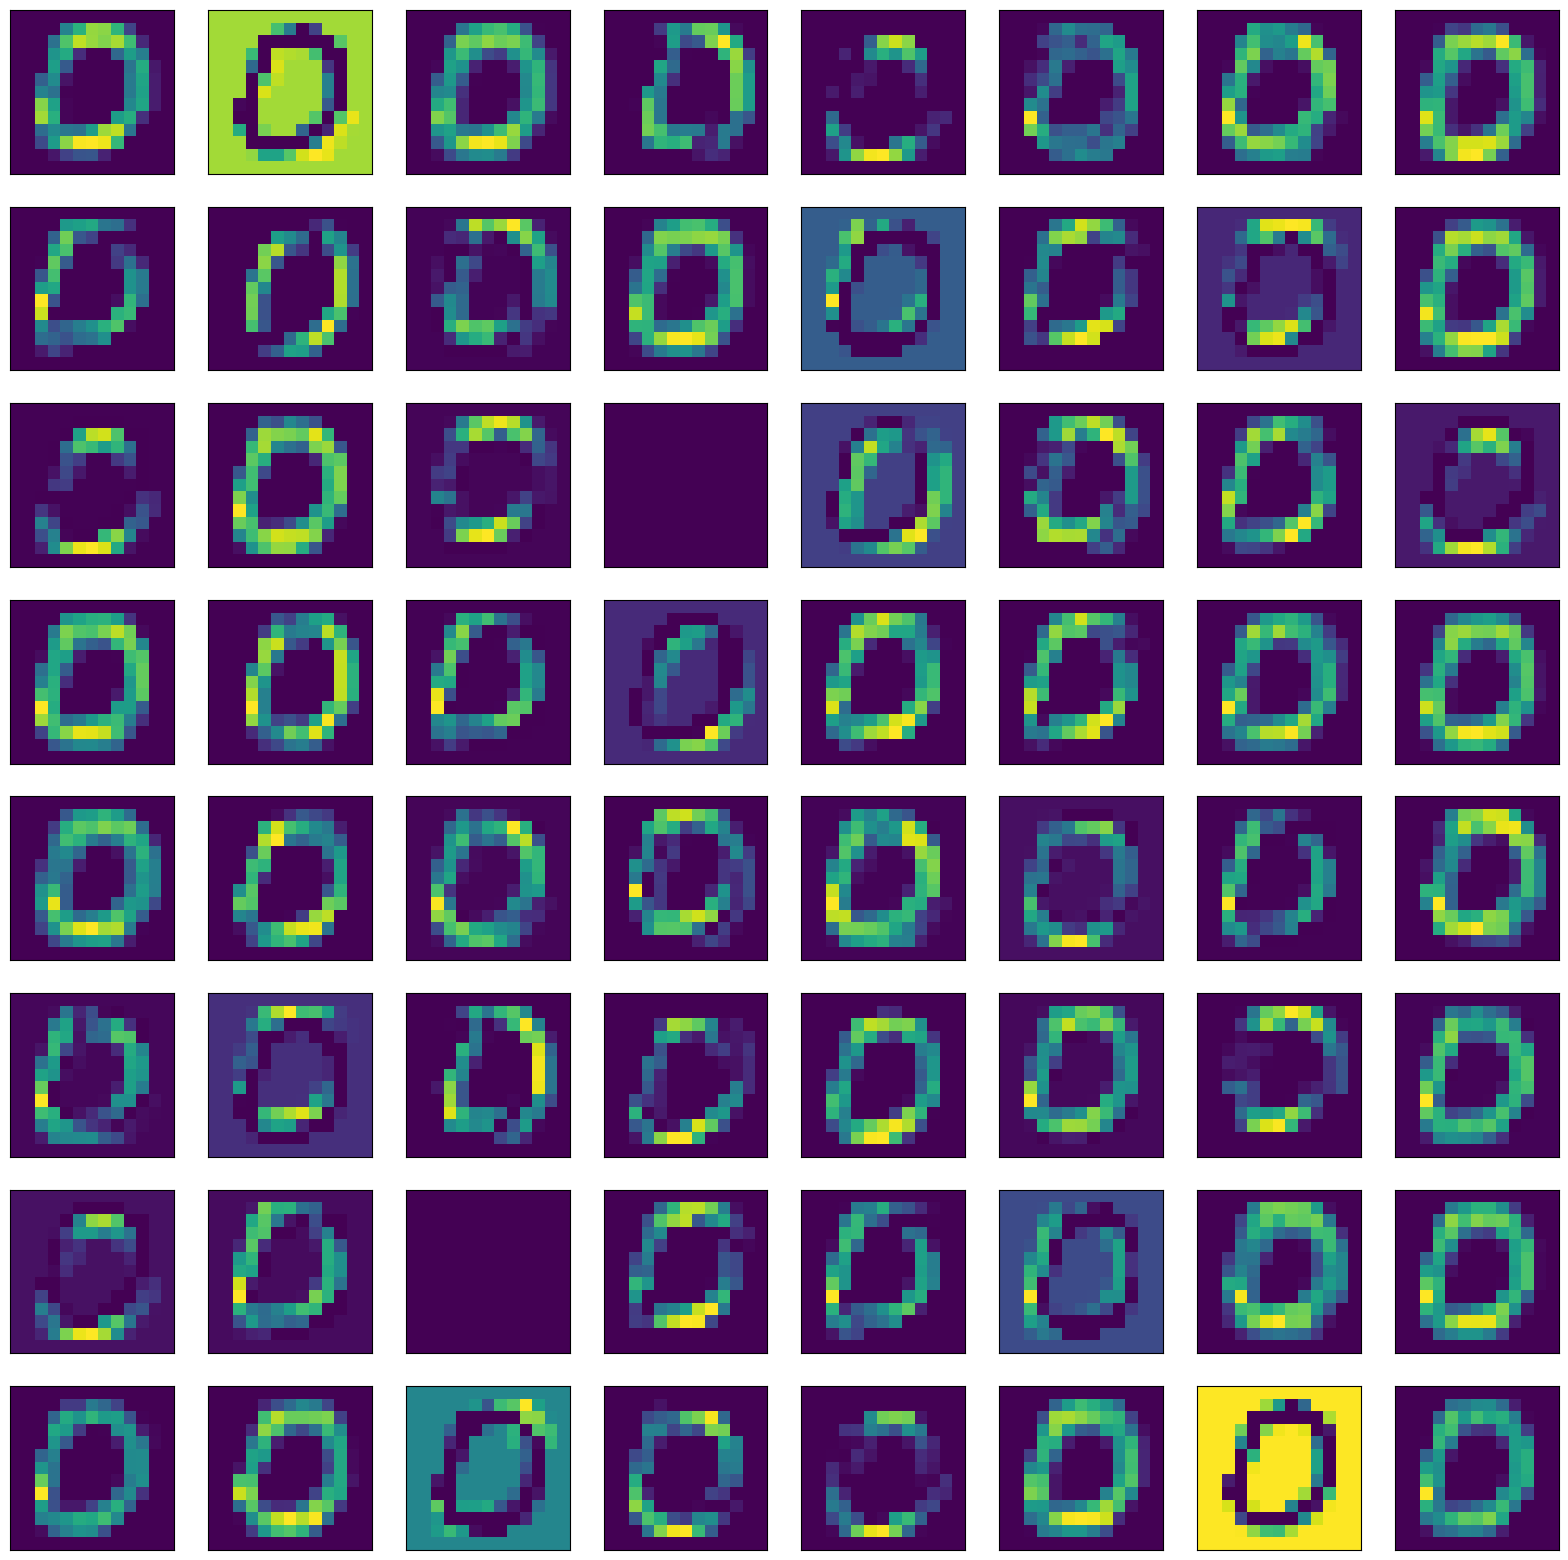

In [38]:
pool1_output = activations[2]      
# shape of first layer activation 
print(pool1_output.shape) 

plt.figure(figsize=(20,20))
for i in range(pool1_output.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pool1_output[0, :, :, i], cmap ='viridis')
plt.show()

(1, 11, 11, 64)


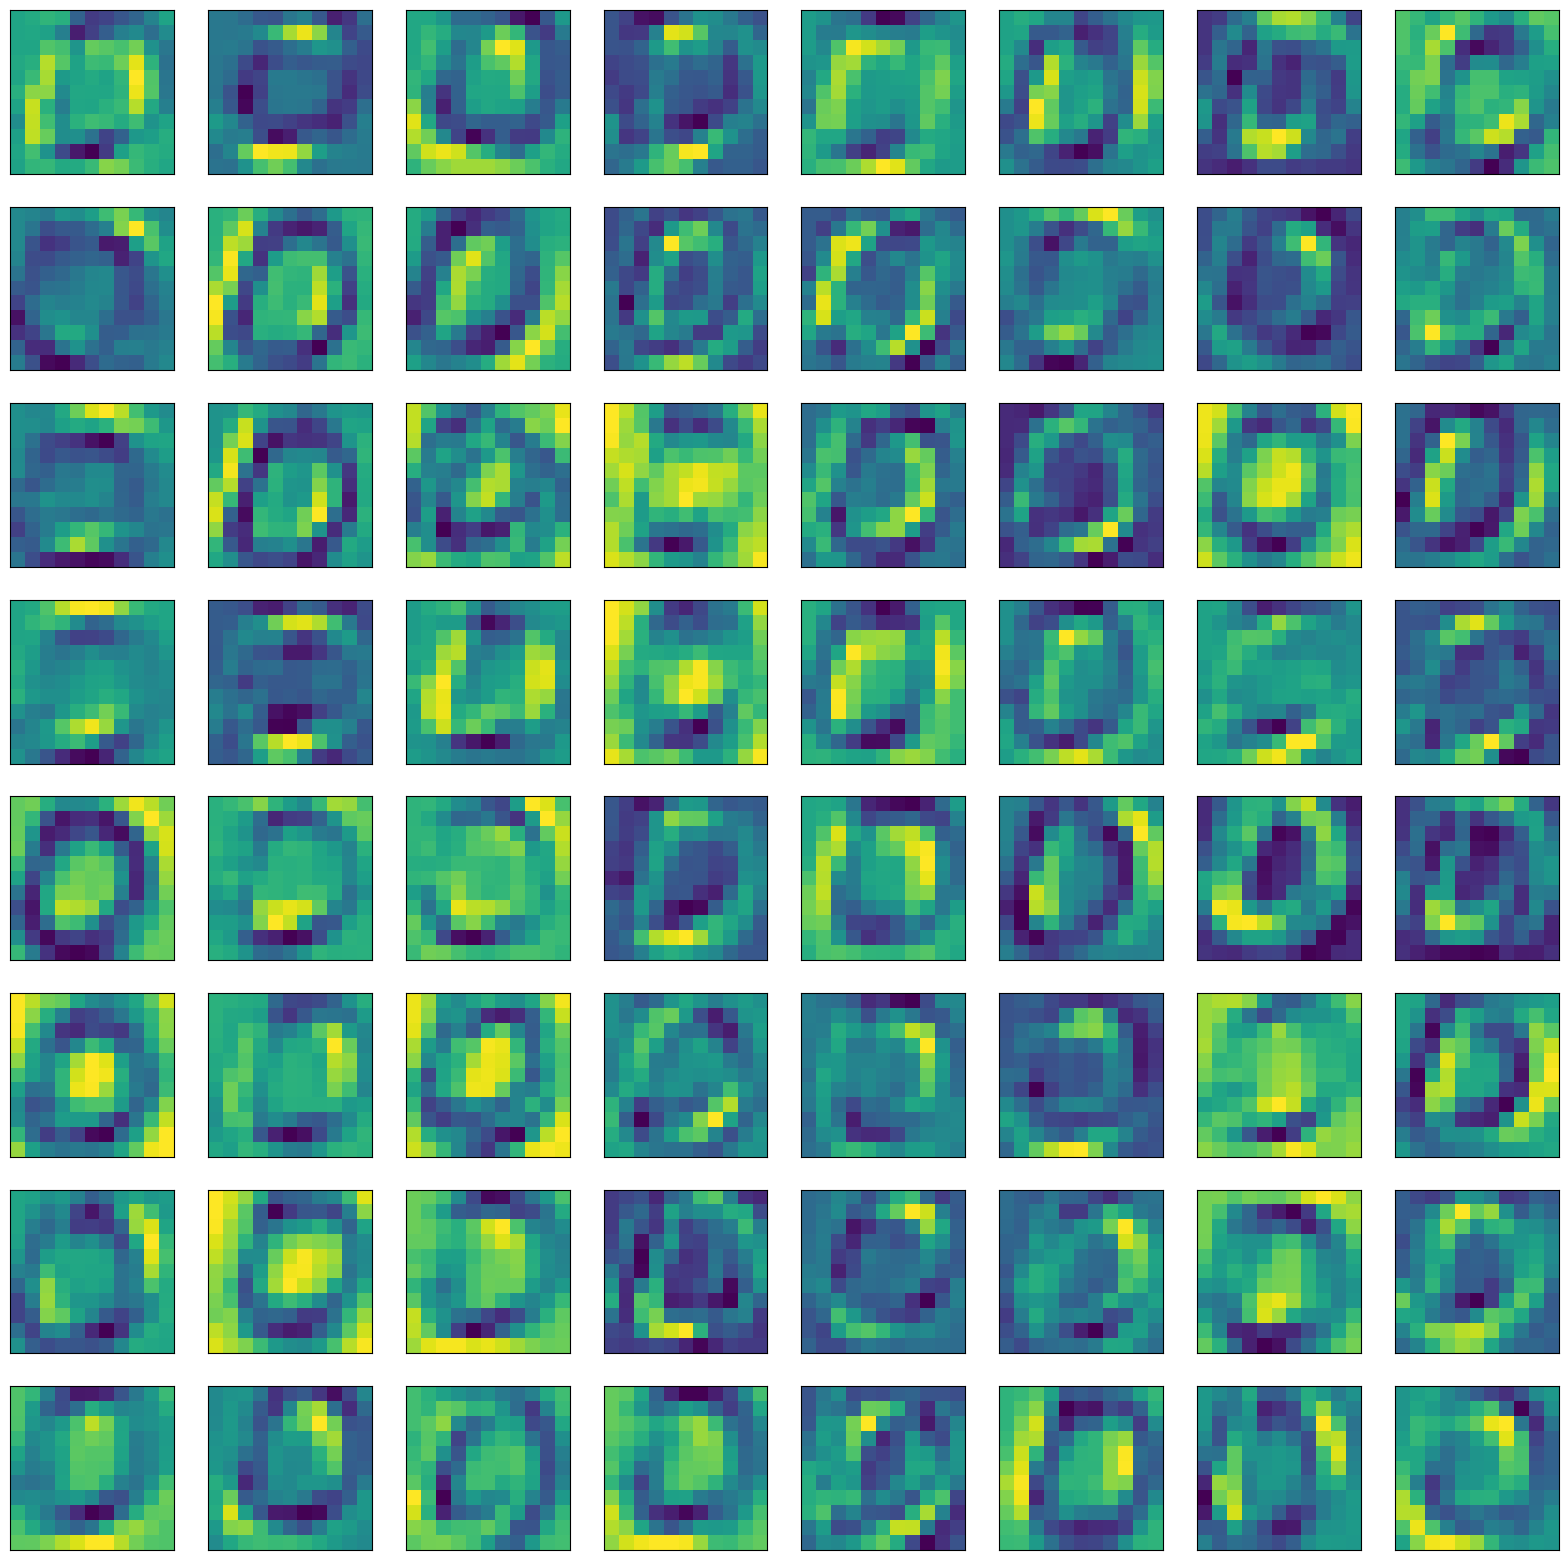

In [39]:
conv2d2_output = activations[3]      
# shape of first layer activation 
print(conv2d2_output.shape) 

plt.figure(figsize=(20,20))
for i in range(conv2d2_output.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(conv2d2_output[0, :, :, i], cmap ='viridis')
plt.show()

(1, 3, 3, 64)


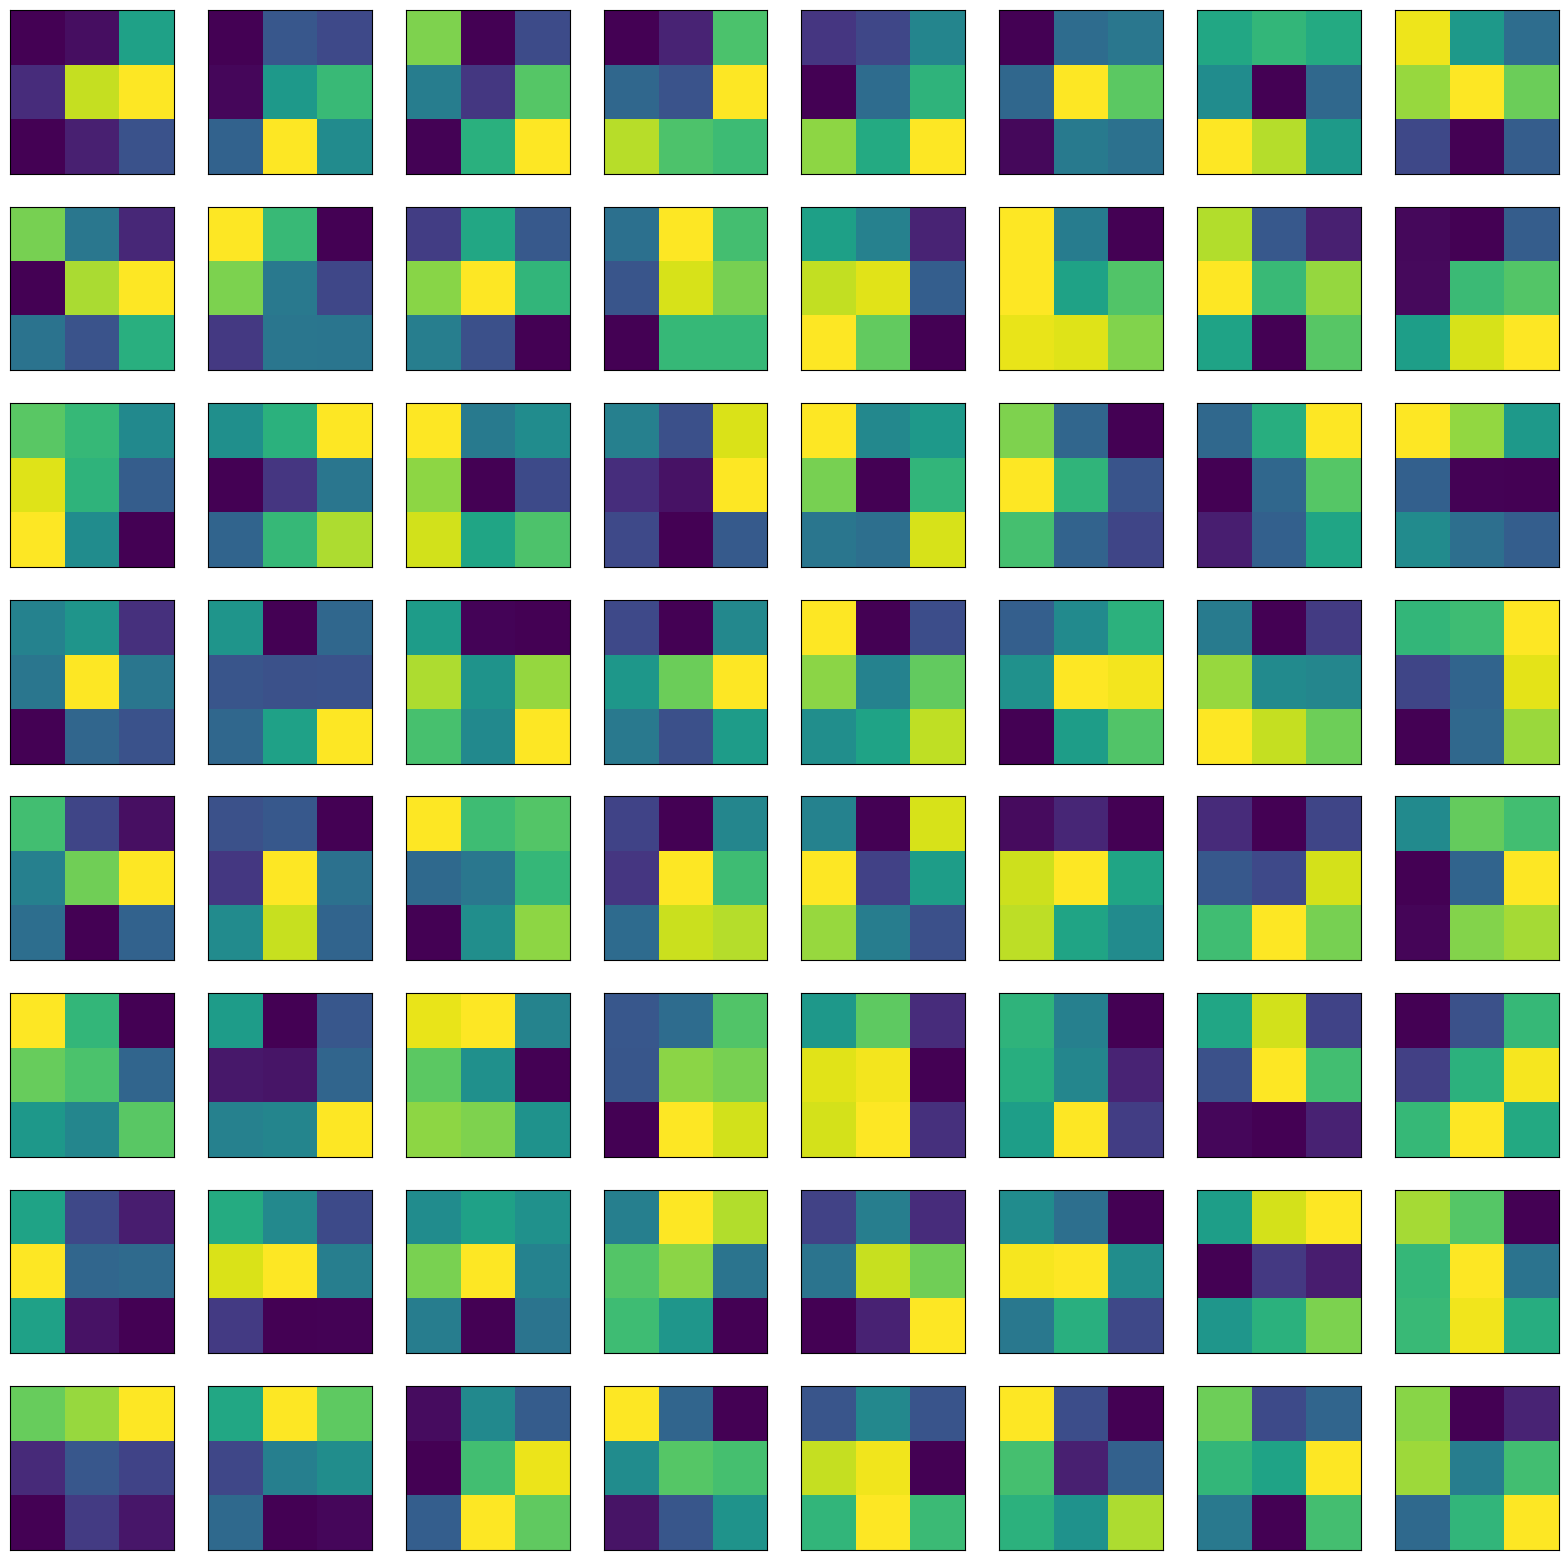

In [40]:
conv2d3_output = activations[6]      
# shape of first layer activation 
print(conv2d3_output.shape) 

plt.figure(figsize=(20,20))
for i in range(conv2d3_output.shape[3]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(conv2d3_output[0, :, :, i], cmap ='viridis')
plt.show()